Assignment 1 - ML Data Cleaning & Feature Selection


In [1]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 4.0 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=9c5d3a5441b4be577b1a3d6c59ddb2416d86b7bd0eb14c38cf965e861d5ee87e
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

In [2]:
import numpy as np
import matplotlib as mlt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn import tree
import sklearn.metrics as sm
import warnings
warnings.filterwarnings("ignore")

Uploading the Bank Management Data set, The Dataset can be described as below.

Input variables:

Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

So there are total 21 columns and 41188 rows(data entries) in the choosen dataset.

In [3]:
from google.colab import files
files = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [4]:
files.values
df = pd.read_csv("bank-additional-full.csv", sep = ";" )
df2= pd.read_csv("bank-additional-full.csv", sep = ";" )

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


The read_csv() is a function in pandas library that is used to read a CSV file and create a dataframe from it


In [5]:
#we will check the data types 

df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
numeric_columns = df.select_dtypes(exclude=['object']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [7]:
#Printing the list of categorical and numerical columns

print(" Categorical Variables are:                ")
for row,col in enumerate(categorical_columns):
    print(f'{row+1}. {col}')
print("\n")
print("Numerical Variables are:                 ")
for row,col in enumerate(numeric_columns):
    print(f'{row+1}. {col}')

 Categorical Variables are:                
1. job
2. marital
3. education
4. default
5. housing
6. loan
7. contact
8. month
9. day_of_week
10. poutcome
11. y


Numerical Variables are:                 
1. age
2. duration
3. campaign
4. pdays
5. previous
6. emp.var.rate
7. cons.price.idx
8. cons.conf.idx
9. euribor3m
10. nr.employed


Q2. ARE THERE ANY MISSING VALUES?

In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

our dataset does not have any null values. Now we will check for naN

In [9]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

So we do not have any missing values in our dependent as well as independent variables

In [10]:
df = df.drop_duplicates()

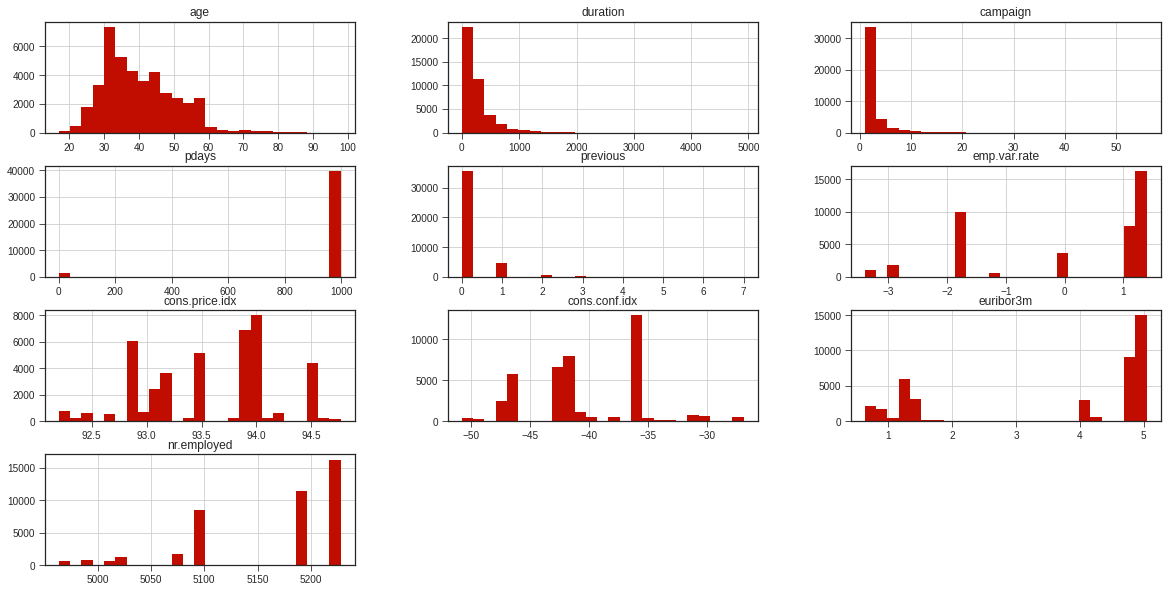

In [11]:
plt.style.use('seaborn-ticks')

df.hist(bins=25, figsize=(20,10), color='#c00d00')
plt.show();

Q3. For the likely distribution of numeric variables

<Figure size 576x360 with 0 Axes>

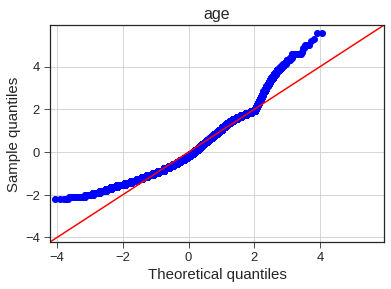

<Figure size 576x360 with 0 Axes>

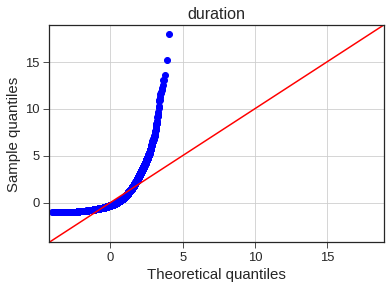

<Figure size 576x360 with 0 Axes>

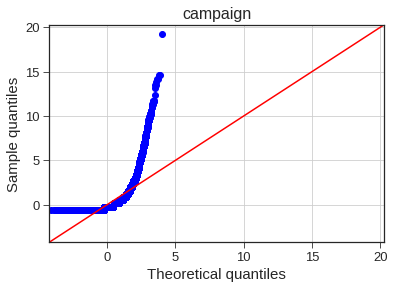

<Figure size 576x360 with 0 Axes>

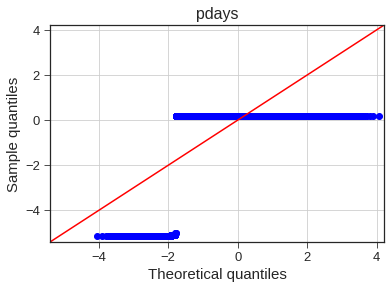

<Figure size 576x360 with 0 Axes>

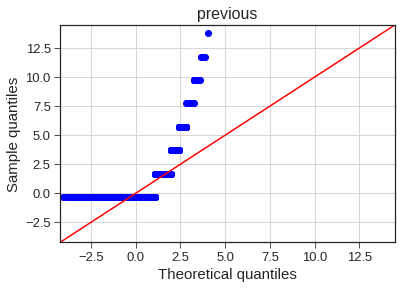

<Figure size 576x360 with 0 Axes>

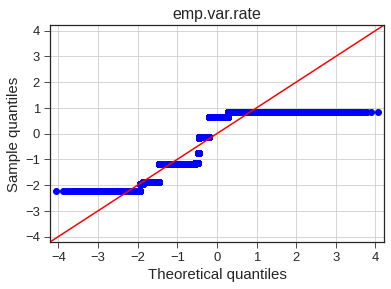

<Figure size 576x360 with 0 Axes>

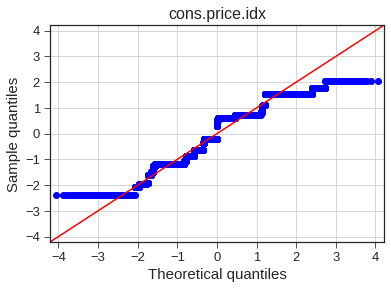

<Figure size 576x360 with 0 Axes>

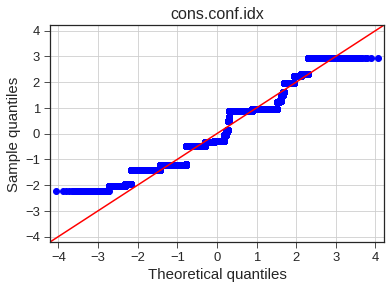

<Figure size 576x360 with 0 Axes>

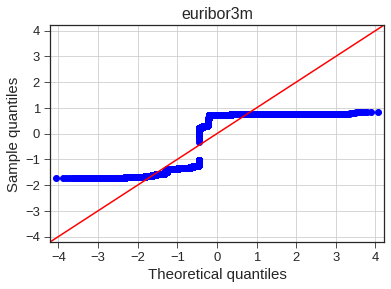

<Figure size 576x360 with 0 Axes>

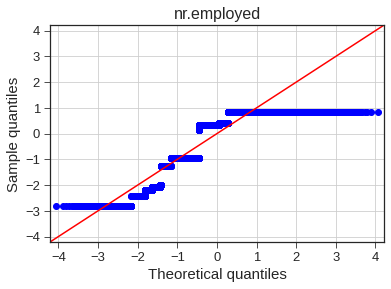

In [12]:
# From above we can observe the likely distributions of all the numeric variable 
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot



# Check normality of independent variables
data_norm=df[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx',
                'cons.conf.idx','euribor3m','nr.employed']]


for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("{}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

  #Age has somewhat normal distribution

From the above, it is clear that age has somewhat normal distribution

**Q4. Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**

**METHOD 1: By using SelectKBest method**

In [13]:
#First we will normalize the data
# Create Dummies
data = pd.get_dummies(df)

# Normalizing the data in the columns beacuse some values are too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats. (between 0-1)
#Here we are not normalizing the categorical variables since there values are 0 or 1 already.

x = data[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']] = pd.DataFrame(x_scaled)


In [14]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,1,0,0,0,0,1,0,1,0
1,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,1,0,0,0,0,1,0,1,0
2,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,1,0,0,0,0,1,0,1,0
3,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,1,0,0,0,0,1,0,1,0
4,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,...,0,1,0,0,0,0,1,0,1,0


In [15]:
np.any(np.isnan(data))



True

In [16]:
np.all(np.isfinite(data))

False

In [17]:
# Import SelectKBest, chi2(score function for classification), f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, chi2, f_regression

In [21]:
# Create feature and target variable for Classification problem
X_clf=data.iloc[:, 0:63] # features
y_clf=data.iloc[:, 64] # Target variable
     

In [19]:

#Since we are getting an error suggesting nans or infs or out of range nums exist.
#since we know no nulls are present we are trying to remove any infs if present.
data.replace([np.inf, -np.inf], np.nan)

data.dropna(inplace=True)
np.any(np.isnan(data))
np.all(np.isfinite(data))



True

In [22]:
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 2]
from sklearn.feature_selection import SelectKBest, f_classif
#X_clf_new = SelectKBest(score_func=chi2,k=10).fit_transform(X_clf,y_clf)
# Create and fit selector
# data = data[np.all(np.isfinite(x), axis=1)]
selector = SelectKBest(f_classif, k=5)
selector.fit(X_clf, y_clf)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = X_clf.iloc[:,cols]
     

In [23]:
features_df_new.head()


,pdays,emp.var.rate,euribor3m,nr.employed,poutcome_success
0,1.0,0.9375,0.957379,0.859735,0
1,1.0,0.9375,0.957379,0.859735,0
2,1.0,0.9375,0.957379,0.859735,0
3,1.0,0.9375,0.957379,0.859735,0
4,1.0,0.9375,0.957379,0.859735,0


By using SelecttKbest method we got above variables as predictable variables.
1. pdays
2. emp.var.rate
3. euribor3m
4. nr.employed
5. poutcome_success

**METHOD 2: By using Z score**

In [24]:
#Calculating Z Score
import pandas as pd
def calculate_z_scores(df):
    return (df - df.mean()) / df.std()
df = pd.DataFrame(data,columns=['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])
df = df.apply(pd.to_numeric)
z_scores = calculate_z_scores(df)
print(z_scores)

            age  duration  campaign     pdays  previous  emp.var.rate  \
0      1.533124  0.010380 -0.565948  0.195471 -0.349567      0.648102   
1      1.629082 -0.421570 -0.565948  0.195471 -0.349567      0.648102   
2     -0.290077 -0.124604 -0.565948  0.195471 -0.349567      0.648102   
3     -0.002203 -0.413856 -0.565948  0.195471 -0.349567      0.648102   
4      1.533124  0.187788 -0.565948  0.195471 -0.349567      0.648102   
...         ...       ...       ...       ...       ...           ...   
41171  3.164409  0.291919 -0.565948  0.195471 -0.349567     -0.752453   
41172  0.573545  0.480897 -0.565948  0.195471 -0.349567     -0.752453   
41173  1.533124 -0.267302 -0.205022  0.195471 -0.349567     -0.752453   
41174  0.381629  0.708442 -0.565948  0.195471 -0.349567     -0.752453   
41175  3.260367 -0.074467  0.155904  0.195471  1.670588     -0.752453   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0            0.722524       0.886679   0.712457     0.331706

If the z score of a data point is more than 3 or less than -3 then it indicates that the data point is quite different from the other data points. Such a data point can be an outlier. We will remove these outliers in the later part.

**METHOD 3: Using OLS for finding the p value to check the significant features**

In [25]:
#Using OLS for p value

import statsmodels.api as sm

model = sm.OLS(data['y_yes'], data[['emp.var.rate','euribor3m','nr.employed','poutcome_nonexistent','poutcome_success']]).fit()

model.summary()
     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  y_yes   R-squared (uncentered):                -131.698
Model:                            OLS   Adj. R-squared (uncentered):           -131.714
Method:                 Least Squares   F-statistic:                             -8170.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):                        1.00
Time:                        03:44:45   Log-Likelihood:                         -8160.2
No. Observations:               41164   AIC:                                  1.633e+04
Df Residuals:                   41159   BIC:                                  1.637e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
emp.var.rate             0.2936      0.017     17.449      0.000       0.261       0.327
euribor3m               -0.4702      0.014    -33.375      0.000      -0.498      -0.443
nr.employed              0.0700      0.011      6.121      0.000       0.048       0.092
poutcome_nonexistent     0.1540      0.005     31.783      0.000       0.144       0.163
poutcome_success         0.5921      0.009     68.536      0.000       0.575       0.609
==============================================================================
Omnibus:                    17518.944   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67090.886
Skew:                           2.184   Prob(JB):                         0.00
Kurtosis:                       7.477   Cond. No.                         23.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here, Considering the significance value of 0.05 

The emp.var.rate has the p-value 0, which is lesser and hence it is a significant feature. 

The euribor3m has the p-value 0, which is lesser and hence it is a significant feature.

The nr.employed has the p-value 0, which is lesser and hence it is a significant feature.

The poutcome_nonexistent has the p-value 0, which is lesser and hence it is a significant feature.

The poutcome_success has the p-value 0, which is lesser and hence it is a significant feature.


**Q5. Which independent variables have missing data? How much?**



ANS: There are no null or nan values in the dataset, as we verified above several times. No missing data.

 **Q6. Do the training and test sets have the same data**?





In [26]:
from sklearn.model_selection import  train_test_split

X = data[ ['emp.var.rate','euribor3m','nr.employed','poutcome_nonexistent','poutcome_success']]

y = data['y_yes']

#Spliting data into Training 80%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.2, random_state=1)

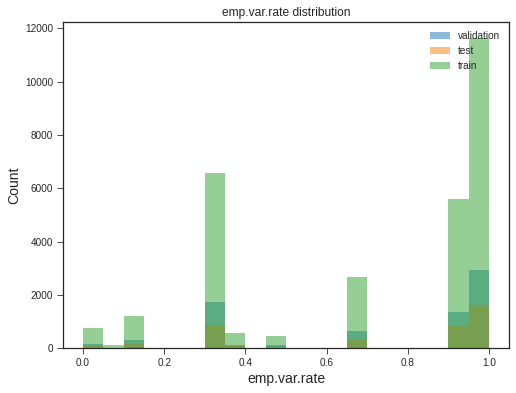

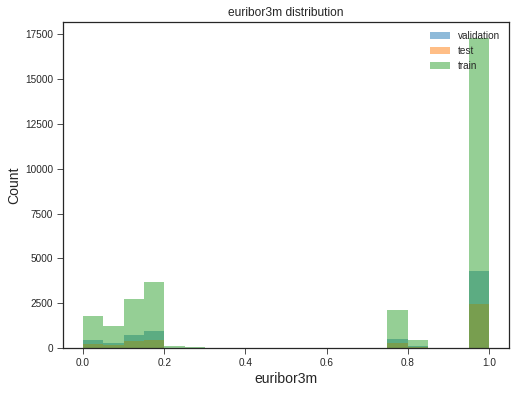

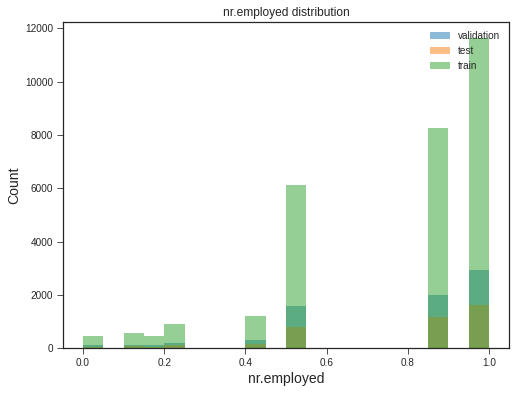

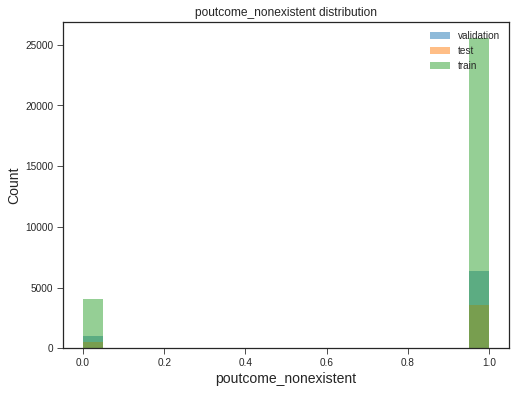

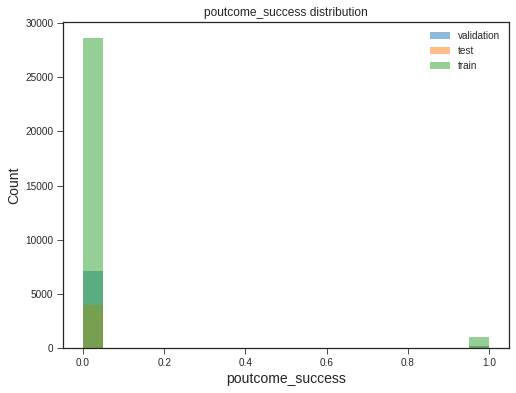

In [27]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['emp.var.rate','euribor3m','nr.employed','poutcome_nonexistent','poutcome_success']]

X_val_plot = X_val[['emp.var.rate','euribor3m','nr.employed','poutcome_nonexistent','poutcome_success']]

X_train_plot = X_train[['emp.var.rate','euribor3m','nr.employed','poutcome_nonexistent','poutcome_success']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()
 

Yes, the training data and testng data are same. The only difference is testing data is less than the training one as testing data is a small part of training data.

**Q7. Are the predictor variables independent of all other predictor variables?**


In [29]:
data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
age,1.000000,-0.000878,0.004651,-0.034400,0.024397,-0.000204,0.001111,0.129067,0.010875,-0.017611,...,0.011991,0.020627,-0.025029,0.019130,-0.026308,-0.012958,-0.005851,0.033175,-0.037232,0.037232
duration,-0.000878,1.000000,-0.071745,-0.047572,0.020610,-0.028051,0.005224,-0.008026,-0.032955,-0.044786,...,-0.010855,-0.021587,0.013409,0.006926,0.012039,0.010257,-0.023255,0.027109,-0.025964,0.025964
campaign,0.004651,-0.071745,1.000000,0.052619,-0.079216,0.150785,0.127797,-0.013618,0.135171,0.144137,...,0.025543,0.009348,0.005136,-0.020507,-0.019454,-0.060270,0.076639,-0.044457,0.051008,-0.051008
pdays,-0.034400,-0.047572,0.052619,1.000000,-0.587530,0.271122,0.078951,-0.091406,0.296993,0.372714,...,0.017674,-0.004376,-0.011392,-0.009568,0.008226,-0.102387,0.211508,-0.231137,0.199334,-0.199334
previous,0.024397,0.020610,-0.079216,-0.587530,1.000000,-0.420639,-0.203213,-0.050862,-0.454598,-0.501459,...,0.004924,-0.000111,0.003530,0.000964,-0.009306,0.198429,-0.294998,0.228040,-0.197789,0.197789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
poutcome_failure,-0.012958,0.010257,-0.060270,-0.102387,0.198429,-0.381731,-0.297156,-0.163009,-0.385567,-0.350106,...,0.019283,-0.001189,-0.004449,-0.006036,-0.007217,1.000000,-0.853260,-0.062990,-0.031908,0.031908
poutcome_nonexistent,-0.005851,-0.023255,0.076639,0.211508,-0.294998,0.472294,0.303272,0.100952,0.488447,0.493382,...,-0.009810,0.002189,-0.000591,0.001487,0.006557,-0.853260,1.000000,-0.466703,0.193580,-0.193580
poutcome_success,0.033175,0.027109,-0.044457,-0.231137,0.228040,-0.256475,-0.076438,0.083254,-0.280882,-0.350468,...,-0.013929,-0.002173,0.008677,0.007391,-0.000309,-0.062990,-0.466703,1.000000,-0.316357,0.316357
y_no,-0.037232,-0.025964,0.051008,0.199334,-0.197789,0.297894,0.135623,-0.053980,0.307715,0.354614,...,0.007285,0.021146,-0.013785,-0.008227,-0.006393,-0.031908,0.193580,-0.316357,1.000000,-1.000000


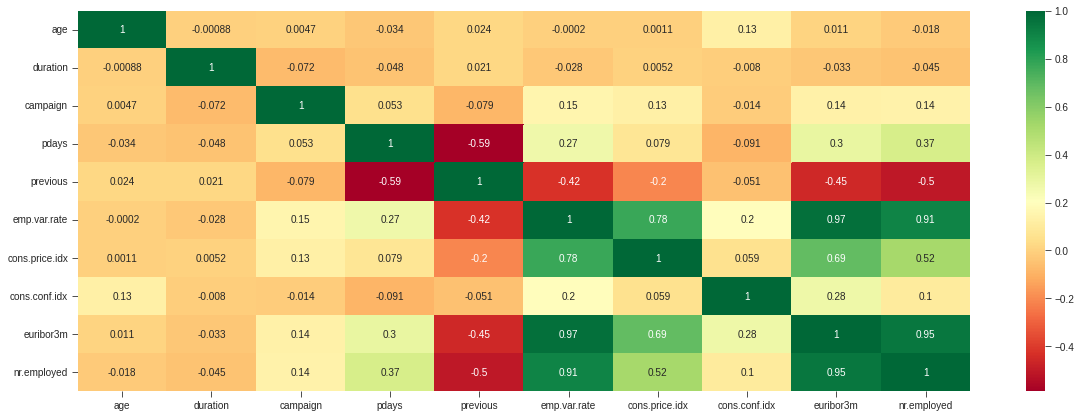

In [30]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

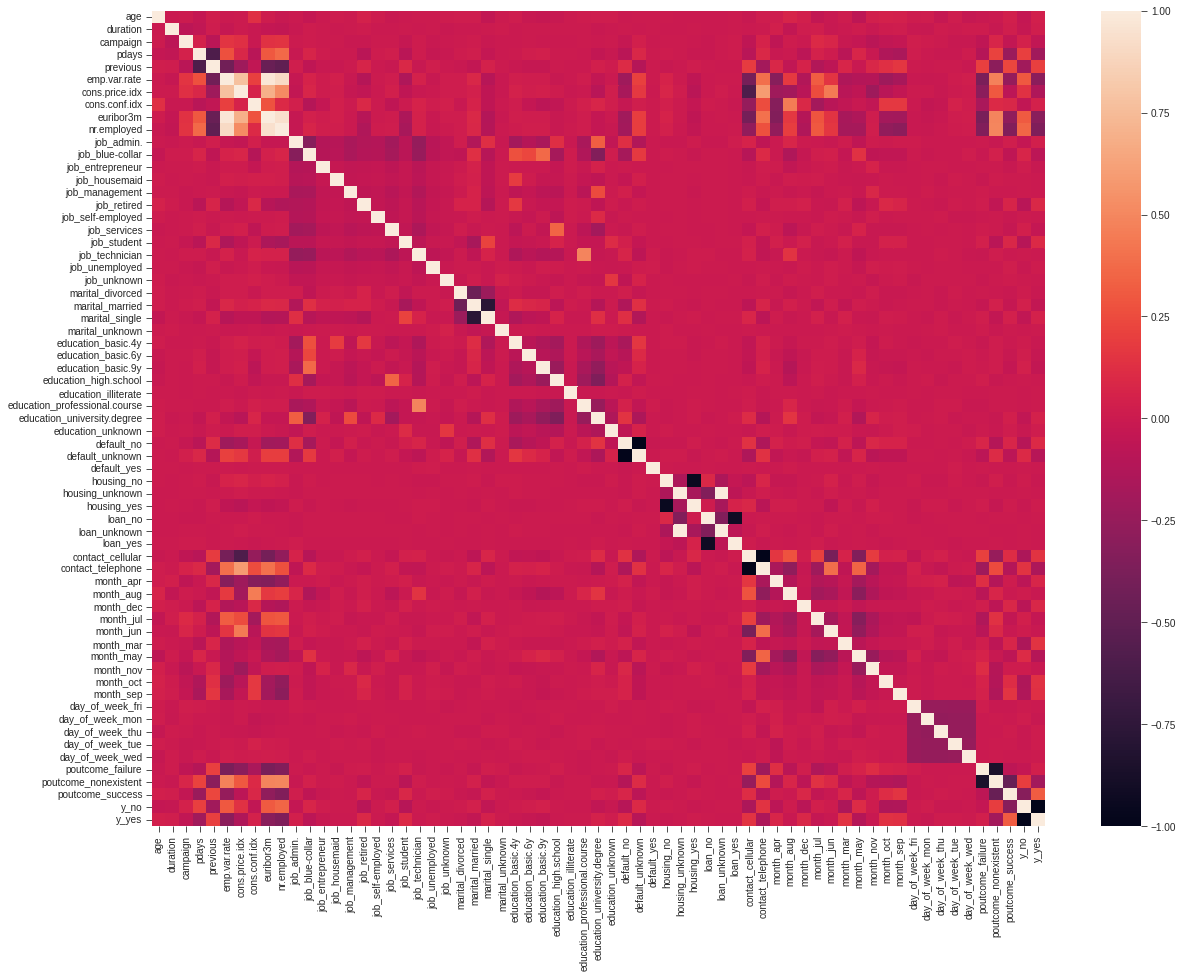

In [31]:
plt.figure(figsize=(20,15))
cor = data.corr()
sns.heatmap(cor)
plt.show()

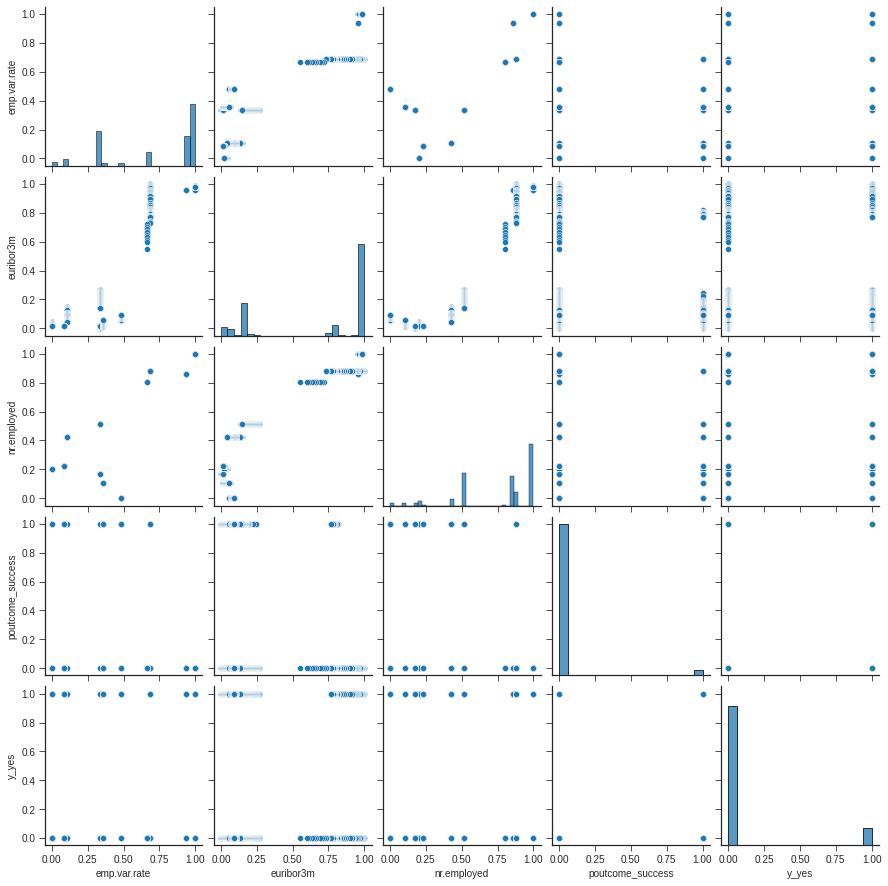

In [68]:
#pair plot to check the colinearity
sns.pairplot(data) 
plt.show()

Yes all the predictor variables are independent of the other predictor variables. Because we can see from the above correlation matrix all the highly correlated variables are removed in the above stage itself.

 **Q8. Which predictor variables are the most important?**

From SelecKbest it is observed that emp.var.rate is the most important predictor variable 
From OLS method euribor3m and poutcome_success should be the most important Predictor variable.

**Q9. Do the ranges of the predictor variables make sense?**

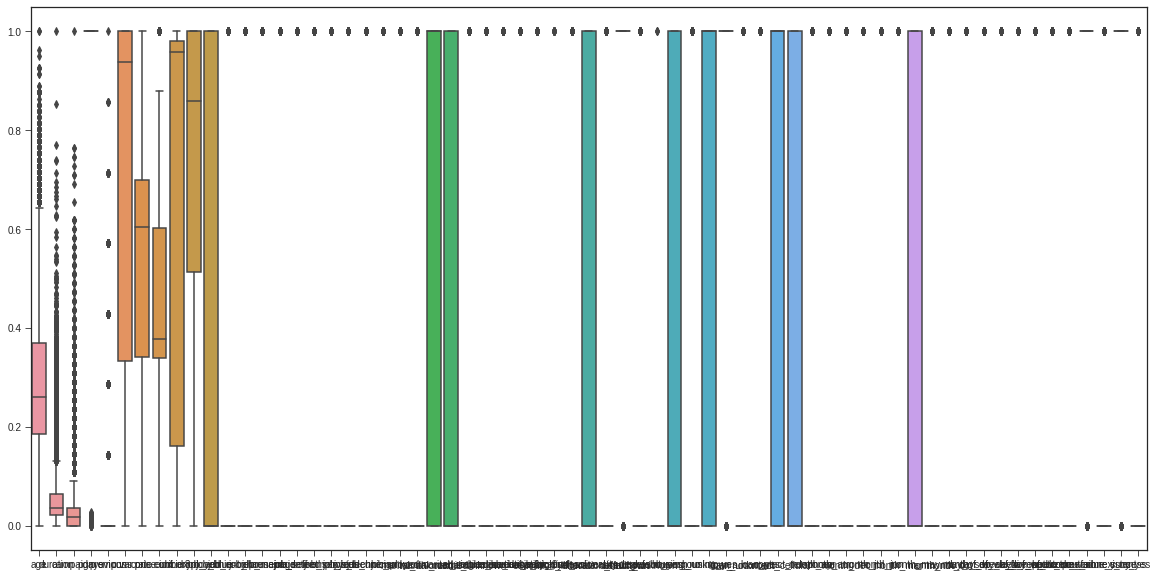

In [34]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,10))
sns.boxplot(data=data)

Since we normalized the data, the variable ranges are practically identical. But as we can see from the image above, there are a lot of outliers that we might need to get rid of before moving on so that the data can start to make a lot more sense.

In [35]:
#creating a drop list to drop the unnesccesary coulms from the dataset
drop_list = ['job_admin.','job_blue-collar','job_entrepreneur','job_housemaid',
             'job_management','job_retired','job_self-employed','job_services',
             'job_student','job_technician','job_unemployed','job_unknown',
             'education_basic.4y','education_basic.6y','education_basic.9y',
            'education_high.school','education_illiterate','education_professional.course'
,'education_university.degree','education_unknown','month_apr','month_aug','month_dec','month_jul',
 'month_jun','month_mar','month_may','month_nov','month_oct','month_sep','contact_cellular'
,'contact_telephone','day_of_week_fri','day_of_week_mon','day_of_week_thu','day_of_week_tue',
'day_of_week_wed','marital_divorced','marital_married','marital_single','marital_unknown','default_unknown',
'housing_unknown','loan_unknown','poutcome_nonexistent','default_no','default_yes','housing_no','housing_yes','loan_no','loan_yes','poutcome_failure',
'age','duration','campaign','pdays','previous','cons.price.idx','cons.conf.idx','y_no']
drop_data = data[drop_list]
data.drop(drop_list,axis=1,inplace=True)

In [36]:
data.describe()

,emp.var.rate,euribor3m,nr.employed,poutcome_success,y_yes
count,41164.000000,41164.000000,41164.000000,41164.000000,41164.000000
mean,0.725408,0.677238,0.769126,0.033306,0.112598
std,0.327251,0.393205,0.273161,0.179436,0.316105
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.160961,0.512287,0.000000,0.000000
50%,0.937500,0.957379,0.859735,0.000000,0.000000
75%,1.000000,0.980957,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


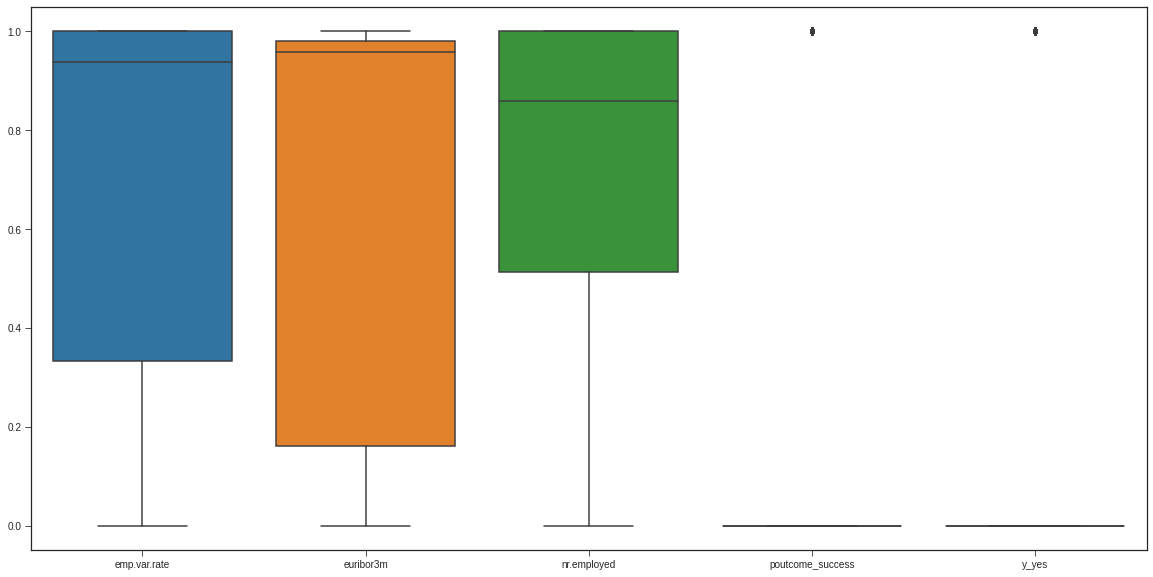

In [37]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,10))
sns.boxplot(data=data)

**Q10. What are the distributions of the predictor variables?**   


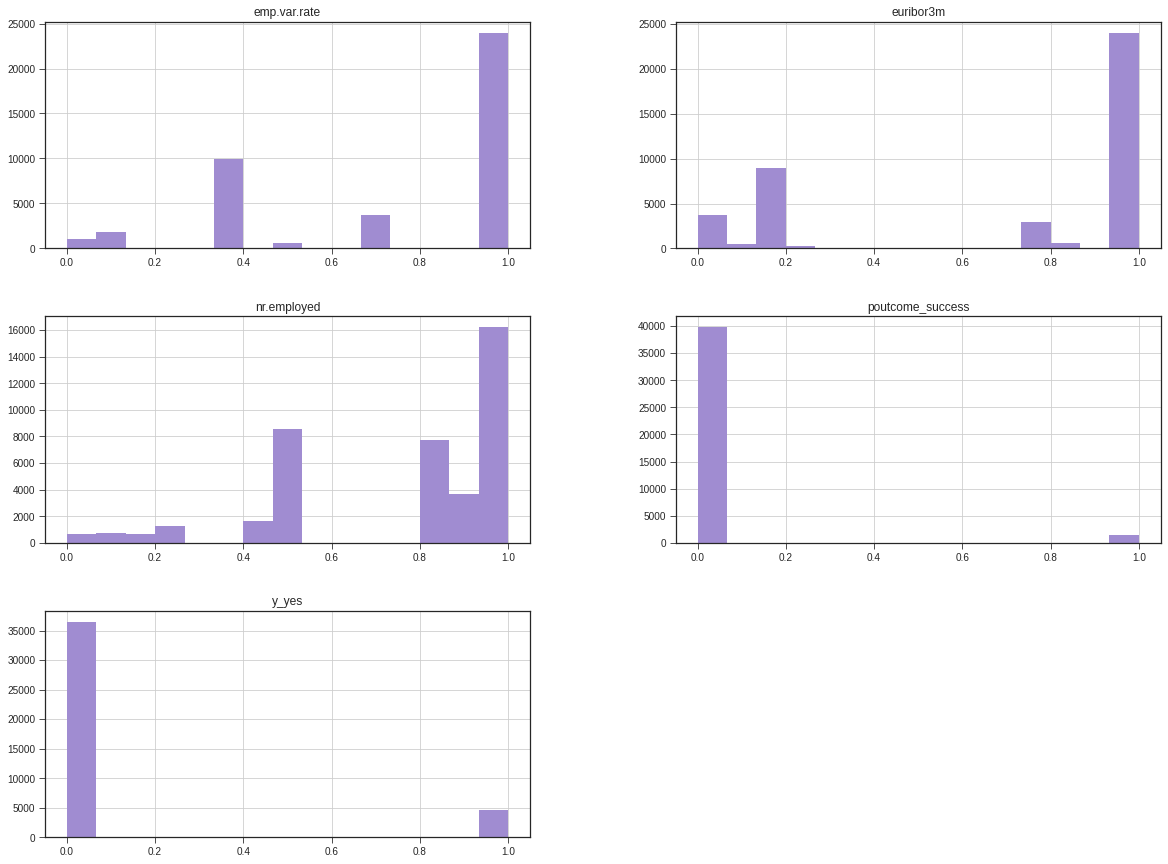

In [38]:
plt.style.use('seaborn-ticks')

data.hist(bins=15, figsize=(20,15), color='#a08cd1')
plt.show();

Q11. **Remove outliers and keep outliers (does if have an effect of the final predictive model)?**



In [39]:
# We will Run the Logistic regression for data before and after removing the outliers
#Now it is for before removing the outliers

#import the pkgs required
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
logisticRegr = LogisticRegression()



In [40]:
#input variables
X1 = data[['emp.var.rate','poutcome_success','euribor3m','nr.employed']]
#output variable
y1 = data[['y_yes']]
#splitting data in to train and test, 20% of data will be used for testing
#stratify for sorting 
#fixed value is assigned like random_state = 42 then no matter how many times you execute your code the result would be the same
X1_train_data, X1_test_data, y1_train_data, y1_test_data = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)
logisticRegr.fit(X1_train_data, y1_train_data)

LogisticRegression()

In [41]:
#The output of a Logistic regression model is a probability. We can select a threshold value. 
#If the probability is greater than this threshold value, the event is predicted to happen otherwise it is predicted not to happen
threshold = 0.5

In [42]:
#setting threshold 0.5 will be the ideal case
logisticRegr.predict(X1_test_data)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [43]:
Z = logisticRegr.predict(X1_test_data)


In [44]:
rms = mean_squared_error(y1_test_data, Z , squared=False);
rms

0.31884798098964545

In [45]:
logisticRegr.score(X1_test_data, y1_test_data)


0.8983359650188266

From the above, we can observe that we got 89% accuracy for our dataset with outliers.

In [46]:
#Now we will remove the outliers

Q1 = data.quantile(0.05)
Q3 = data.quantile(0.95)
#IQR = Q3 - Q1 I tried IQR method but it's returing me with nan, so I opted manually 
#to remove outliers less than 5 persentile and more than 95 percentile.

#data2 = data2[~((data2 < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
final_data = data[~((data < (Q1)) |(data > (Q3))).any(axis=1)]

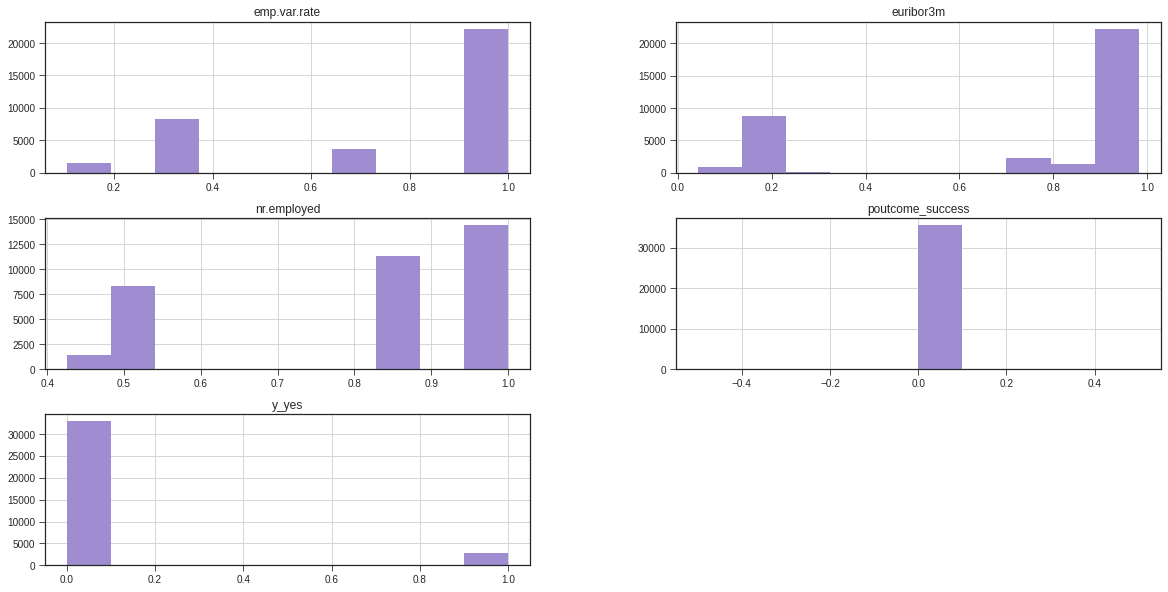

In [47]:

plt.style.use('seaborn-ticks')

final_data.hist(bins=10, figsize=(20,10), color='#a08cd1')
plt.show();

Now we will again check the accuracy after removing the outliers

In [48]:
#import the required packages 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
logisticRegr = LogisticRegression()
#input variables
X2 = final_data[['emp.var.rate','poutcome_success','euribor3m','nr.employed']]
#output variable
y2 = final_data[['y_yes']]
#splitting data in to train and test, 20% of data will be used for testing
#stratify for sorting 
#fixed value is assigned like random_state = 42 
X2_train_data, X2_test_data, y2_train_data, y2_test_data = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)
logisticRegr.fit(X2_train_data, y2_train_data)

LogisticRegression()

In [49]:
#The output of a Logistic regression model is a probability. We can select a threshold value. 
#If the probability is greater than this threshold value, the event is predicted to happen otherwise it is predicted not to happen
threshold = 0.5
#setting threshold 0.5 will be the ideal case
logisticRegr.predict(X2_test_data)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [50]:

Z2 = logisticRegr.predict(X2_test_data)
     

In [51]:

rms = mean_squared_error(y2_test_data, Z2 , squared=False);
rms

0.27574724389522315

In [52]:
logisticRegr.score(X2_test_data, y2_test_data)


0.9239634574841883

**So for final_data(without outliers) the accuracy is 92.3%**

And the data with Outliers has the accuracy of 89%

We can conclude that Data with outliers predicts less accuracy than the oe without outliers.

**Q12 Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.**

In [53]:
!pip install fancyimpute


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 KB 13.3 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29898 sha256=726745af485fc3791f16a97f2bf61b64014266a498131a98275ae589dff9ce95
  Stored in directory: /root/.cache/pip/wheels/45/e1/7c/5f6e503d959df84af6d91e87ae288961a906f895d910f6533b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=ef822446d5447a16d5057c73920834b04181ca8d982b93307db1a04990709056
  Stored in directory: /root/.cache/pip/wheels/5f/e9/7a/9969b4e11eb626b45f12a46849b8c65aa718244a243583caf1
Successfully built fancyimpute knnimpute


In [54]:

from sklearn.impute import SimpleImputer
from fancyimpute import KNN

# Remove 1%, 5%, and 10% of the data randomly
def remove_random_data(data, percentage):
    rows = data.shape[0]
    columns = data.shape[1]
    to_remove = int(rows * percentage)
    indexes = np.random.choice(rows, to_remove, replace=False)
    data_missing = data.copy()
    data_missing.iloc[indexes, :] = np.nan
    return data_missing

In [55]:

# Calculate % error on residuals for numeric data
def calculate_error(data, data_missing, method):
    data_imputed = method.fit_transform(data_missing)
    error = np.abs(data_imputed - data)
    total_error = error.sum()
    percent_error = (total_error / data.size) * 100
    return percent_error
    

In [56]:

# Check for bias and variance of the error
def check_bias_variance(data, data_missing, method):
    data_imputed = method.fit_transform(data_missing)
    bias = np.mean(data_imputed - data)
    variance = np.var(data_imputed - data)
    return bias, variance

In [57]:

# Remove 1% of data
data_missing_1 = remove_random_data(data, 0.01)

In [58]:

# Remove 5% of data
data_missing_5 = remove_random_data(data, 0.05)

# Remove 10% of data
data_missing_10 = remove_random_data(data, 0.1)

In [59]:


# Impute values using the mean method
mean_imp = SimpleImputer(strategy='mean')
mean_error_1 = calculate_error(data, data_missing_1, mean_imp)
mean_error_5 = calculate_error(data, data_missing_5, mean_imp)
mean_error_10 = calculate_error(data, data_missing_10, mean_imp)
mean_bias_1, mean_variance_1 = check_bias_variance(data, data_missing_1, mean_imp)
mean_bias_5, mean_variance_5 = check_bias_variance(data, data_missing_5, mean_imp)
mean_bias_10, mean_variance_10 = check_bias_variance(data, data_missing_10, mean_imp)


In [60]:
# Impute values using the median method
median_imp = SimpleImputer(strategy='median')
median_error_1 = calculate_error(data, data_missing_1, median_imp)
median_error_5 = calculate_error(data, data_missing_5, median_imp)
median_error_10 = calculate_error(data, data_missing_10, median_imp)
median_bias_1, median_variance_1 = check_bias_variance(data, data_missing_1, median_imp)
median_bias_5, median_variance_5 = check_bias_variance(data, data_missing_5, median_imp)
median_bias_10, median_variance_10 = check_bias_variance(data, data_missing_10, median_imp)

In [61]:
print("Mean Impute Error for 1% Missing Data: ", mean_error_1)
print("Mean Impute Error for 5% Missing Data: ", mean_error_5)
print("Mean Impute Error for 10% Missing Data: ", mean_error_10)
print("Median Impute Error for 1% Missing Data: ", median_error_1)
print("Median Impute Error for 5% Missing Data: ", median_error_5)
print("Median Impute Error for 10% Missing Data: ", median_error_10)


Mean Impute Error for 1% Missing Data:  emp.var.rate        0.059754
euribor3m           0.073568
nr.employed         0.047191
poutcome_success    0.010754
y_yes               0.038685
dtype: float64
Mean Impute Error for 5% Missing Data:  emp.var.rate        0.298408
euribor3m           0.366729
nr.employed         0.237171
poutcome_success    0.071894
y_yes               0.203844
dtype: float64
Mean Impute Error for 10% Missing Data:  emp.var.rate        0.590290
euribor3m           0.721637
nr.employed         0.467429
poutcome_success    0.130755
y_yes               0.399824
dtype: float64
Median Impute Error for 1% Missing Data:  emp.var.rate        0.054295
euribor3m           0.062138
nr.employed         0.041603
poutcome_success    0.004373
y_yes               0.020892
dtype: float64
Median Impute Error for 5% Missing Data:  emp.var.rate        0.271900
euribor3m           0.309705
nr.employed         0.208405
poutcome_success    0.041784
y_yes               0.118064
dtype: flo

In [63]:
print("Mean Impute Bias for 1% Missing Data: " , mean_bias_1)
print("Mean Impute Variance for 1% Missing Data: ", mean_variance_1)
print("Median Impute Bias for 1% Missing Data: ", median_bias_1)
print("Median Impute Variance for 1% Missing Data: ", median_variance_1)


Mean Impute Bias for 1% Missing Data:  emp.var.rate        0.000112
euribor3m           0.000141
nr.employed         0.000053
poutcome_success    0.000115
y_yes               0.000080
dtype: float64
Mean Impute Variance for 1% Missing Data:  emp.var.rate        0.001086
euribor3m           0.001573
nr.employed         0.000738
poutcome_success    0.000215
y_yes               0.000936
dtype: float64
Median Impute Bias for 1% Missing Data:  emp.var.rate        0.002229
euribor3m           0.002936
nr.employed         0.000957
poutcome_success   -0.000219
y_yes              -0.001045
dtype: float64
Median Impute Variance for 1% Missing Data:  emp.var.rate        0.001577
euribor3m           0.002426
nr.employed         0.000828
poutcome_success    0.000219
y_yes               0.001044
dtype: float64


In [64]:
#By using KNN
from sklearn.impute import KNNImputer


# Specify the number of nearest neighbors to use (k)
k = 5

# Create the KNN imputer
imputer = KNNImputer(n_neighbors=k)

# Impute the missing values in data_missing_1 using KNN
data_imputed_1 = imputer.fit_transform(data_missing_1)

# Impute the missing values in data_missing_5 using KNN
data_imputed_5 = imputer.fit_transform(data_missing_5)

# Impute the missing values in data_missing_10 using KNN
data_imputed_10 = imputer.fit_transform(data_missing_10)

In [65]:
#To print the mean squared error (MSE) between the original values and the imputed values

# Calculate the MSE between the original data and data_imputed_1
mse_1 = np.mean((data - data_imputed_1)**2)
print("MSE for 1% missing data:", mse_1)

# Calculate the MSE between the original data and data_imputed_5
mse_5 = np.mean((data - data_imputed_5)**2)
print("MSE for 5% missing data:", mse_5)

# Calculate the MSE between the original data and data_imputed_10
mse_10 = np.mean((data - data_imputed_10)**2)
print("MSE for 10% missing data:", mse_10)


MSE for 1% missing data: emp.var.rate        0.001086
euribor3m           0.001573
nr.employed         0.000738
poutcome_success    0.000215
y_yes               0.000936
dtype: float64
MSE for 5% missing data: emp.var.rate        0.005478
euribor3m           0.007876
nr.employed         0.003767
poutcome_success    0.002006
y_yes               0.005208
dtype: float64
MSE for 10% missing data: emp.var.rate        0.010754
euribor3m           0.015208
nr.employed         0.007269
poutcome_success    0.003331
y_yes               0.010001
dtype: float64


**For categorical data, calculate the accuracy and a confusion matrix.**
From above we already got the accuracy be 89%(with outliers) and 92% without them.

Now

Confusion Matrix:

A confusion matrix is a technique for summarizing the performance of a classification algorithm.


In [66]:

#Confusion matric for data with out outliers
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report #for classification_report
print(classification_report(y2_test_data,Z2))
print(confusion_matrix(y2_test_data,Z2))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      6574
           1       0.00      0.00      0.00       541

    accuracy                           0.92      7115
   macro avg       0.46      0.50      0.48      7115
weighted avg       0.85      0.92      0.89      7115

[[6574    0]
 [ 541    0]]


In [67]:

#Confusion matric for data with outliers
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import classification_report #for classification_report
print(classification_report(y1_test_data,Z))
print(confusion_matrix(y1_test_data,Z))


              precision    recall  f1-score   support

           0       0.90      0.99      0.95      7306
           1       0.70      0.17      0.28       927

    accuracy                           0.90      8233
   macro avg       0.80      0.58      0.61      8233
weighted avg       0.88      0.90      0.87      8233

[[7236   70]
 [ 767  160]]


**Conclusion**

The analysis of the data set performed above makes it clear that the important  dependent variables are emp.var.rate ,  euribor3m and poutcome_success and they are significant. Also recognized the significance of the factors for data training.
After removing the outliers, our dataset showed a gretaer accuracy.

Reference links:
https://datasciencesphere.com/analytics/5-easy-ways-to-detect-outliers-in-python/



https://machinelearningmastery.com/calculate-feature-importance-with-python/



https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/ML_Data_Cleaning_and_Feature_Selection/6105_ML_Data_Cleaning_and_Feature_Selection_Abalone_Example/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb




https://www.digitalocean.com/community/tutorials/normalize-data-in-python




https://www.datatechnotes.com/2021/02/seleckbest-feature-selection-example-in-python.html




https://www.statology.org/confusion-matrix-python/#:~:text=Logistic%20regression%20is%20a%20type,values%20from%20the%20test%20dataset.


Also
youtube: 
1. stat quest
2. geeksforgeeks
3. towards data science


**Licensing**


Copyright 2023 Pramita Dileep Sandhyan


Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.